In [93]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import mlflow

# Ensure plots are displayed inline in the Jupyter notebook
%matplotlib inline


In [11]:
url = "https://github.com/erkansirin78/datasets/raw/master/housing.csv"
data = pd.read_csv(url)


In [12]:
# Display the first few rows of the dataframe
display(data.head())

# Get a concise summary of the dataframe
data.info()

# Generate descriptive statistics
display(data.describe())

# Check for missing values
display(data.isnull().sum())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### OUTLIERS

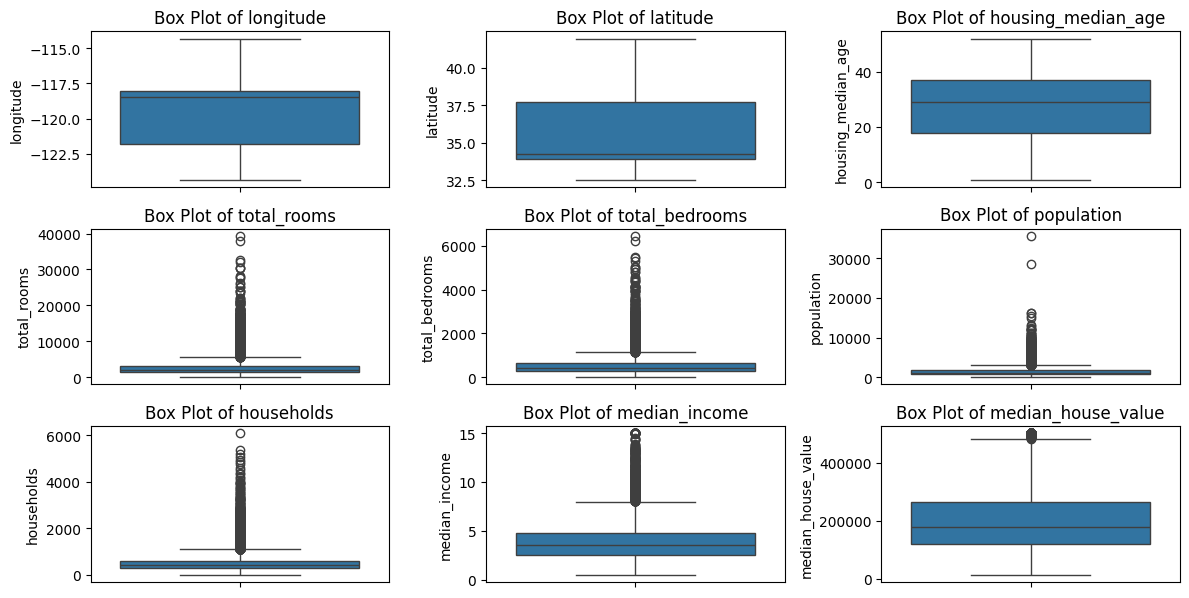

In [18]:
# Selecting numerical columns to check for outliers
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Creating box plots for each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i + 1)
    sns.boxplot(y=col, data=data)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()


In [22]:
def find_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    percentage = (len(outliers) / len(data)) * 100

    return outliers, percentage


In [24]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Applying the function and printing results
outlier_summaries = {}
for feature in numerical_cols:
    outliers, percentage = find_outliers(data, feature)
    outlier_summaries[feature] = (len(outliers), percentage)
    print(f"Feature: {feature}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {percentage:.2f}%")
    #print(f"Outliers:\n{outliers.head()}")  # Print first few outliers for brevity
    print("\n")


Feature: longitude
Number of outliers: 0
Percentage of outliers: 0.00%


Feature: latitude
Number of outliers: 0
Percentage of outliers: 0.00%


Feature: housing_median_age
Number of outliers: 0
Percentage of outliers: 0.00%


Feature: total_rooms
Number of outliers: 1287
Percentage of outliers: 6.24%


Feature: total_bedrooms
Number of outliers: 1306
Percentage of outliers: 6.33%


Feature: population
Number of outliers: 1196
Percentage of outliers: 5.79%


Feature: households
Number of outliers: 1220
Percentage of outliers: 5.91%


Feature: median_income
Number of outliers: 681
Percentage of outliers: 3.30%


Feature: median_house_value
Number of outliers: 1071
Percentage of outliers: 5.19%




In [25]:
# Removing outliers from the dataset
cleaned_data = data.drop(outliers)
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {cleaned_data.shape}")


Original data shape: (20640, 10)
Cleaned data shape: (17609, 10)


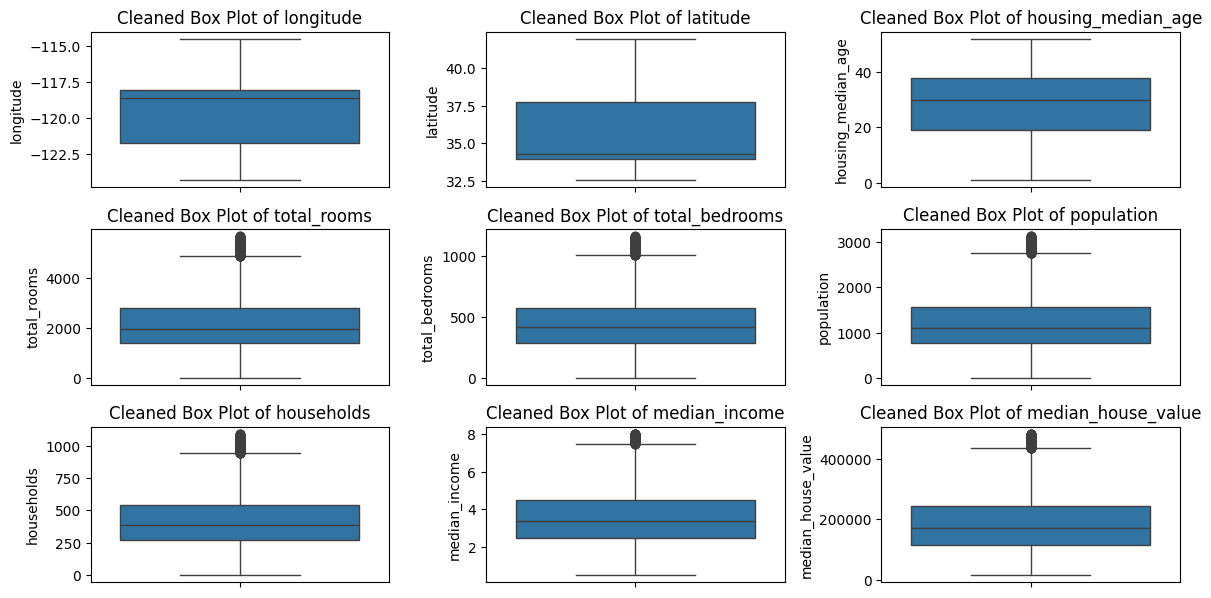

In [38]:
# Re-plotting box plots for cleaned data
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols)//3 + 1, 3, i + 1)
    sns.boxplot(y=col, data=cleaned_data)
    plt.title(f'Cleaned Box Plot of {col}')
    plt.tight_layout()


#### MISSING VALUES

In [40]:
# Check for missing values in each column
missing_values = cleaned_data.isnull().sum()
print(missing_values)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


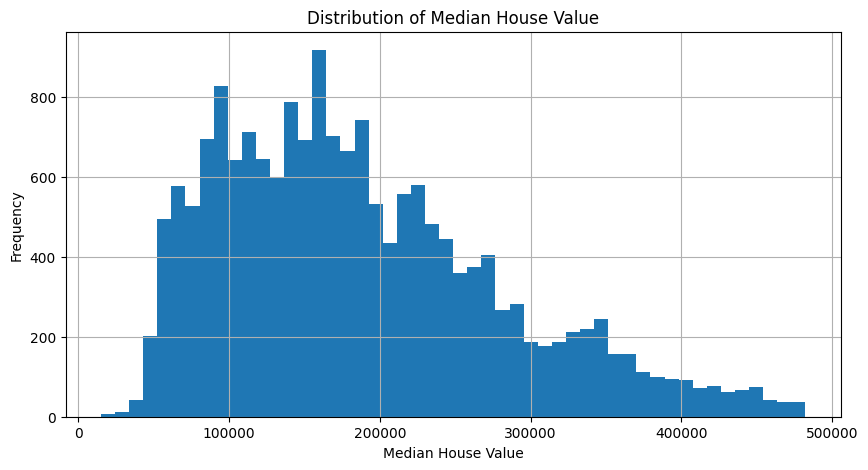

In [36]:
# Histogram of the 'median_house_value'
cleaned_data['median_house_value'].hist(bins=50, figsize=(10,5))
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


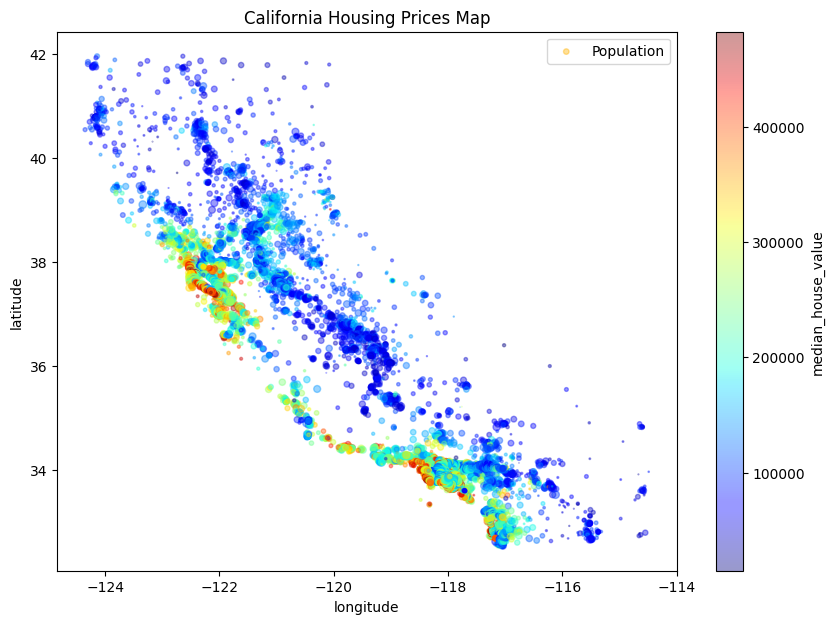

In [28]:
cleaned_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
          s=cleaned_data["population"]/100, label="Population", figsize=(10,7),
          c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.title('California Housing Prices Map')
plt.legend()
plt.show()


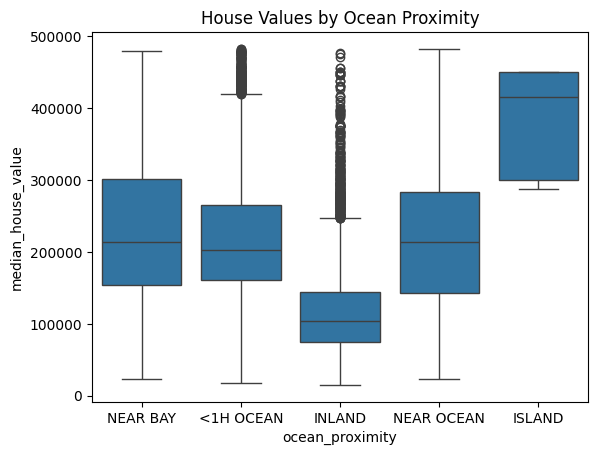

In [33]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=cleaned_data)
plt.title('House Values by Ocean Proximity')
plt.show()

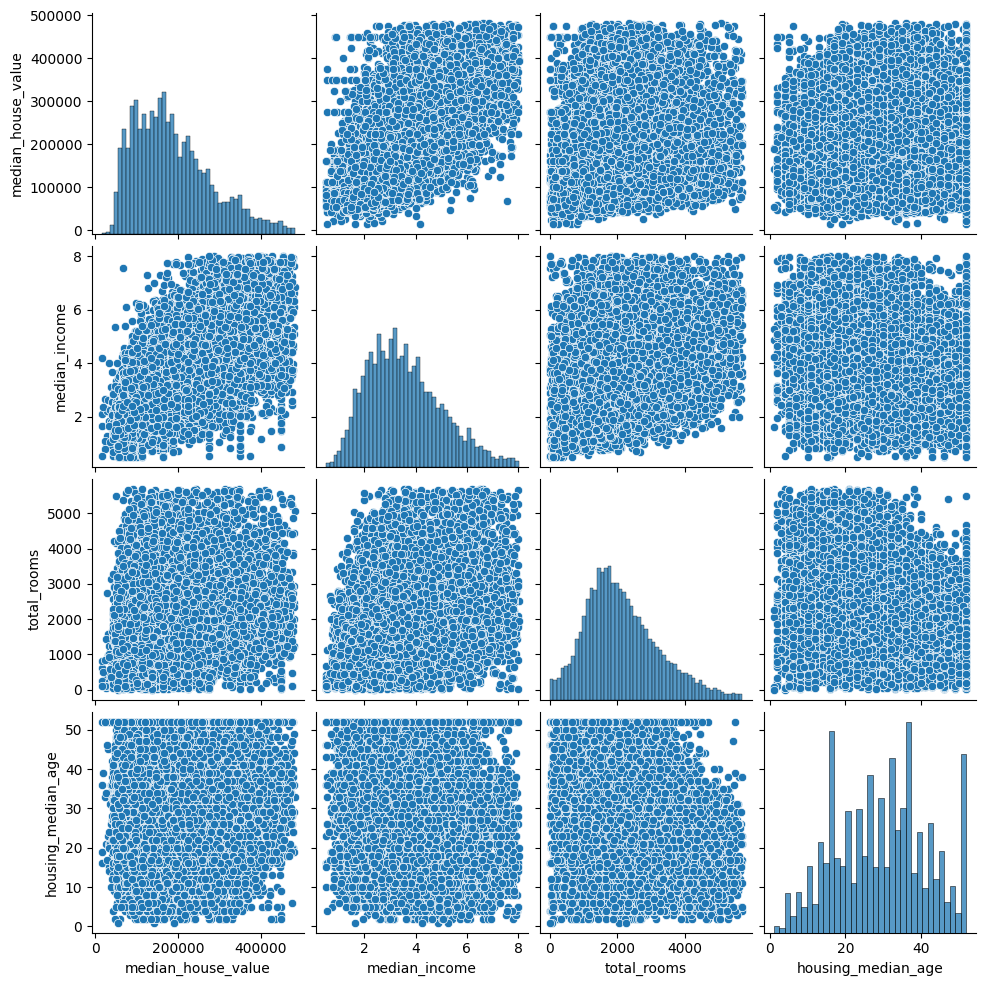

In [32]:
# Selecting a few potentially interesting features
features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(cleaned_data[features])
plt.show()

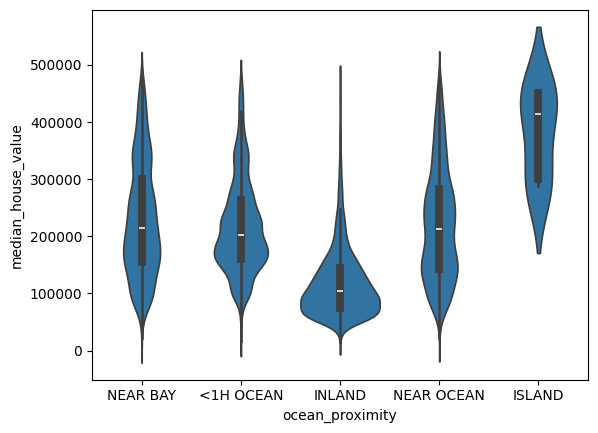

In [35]:
sns.violinplot(x='ocean_proximity', y='median_house_value', data=cleaned_data)
plt.show()


In [42]:

# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in the same column
cleaned_data['ocean_proximity'] = labelencoder.fit_transform(cleaned_data['ocean_proximity'])


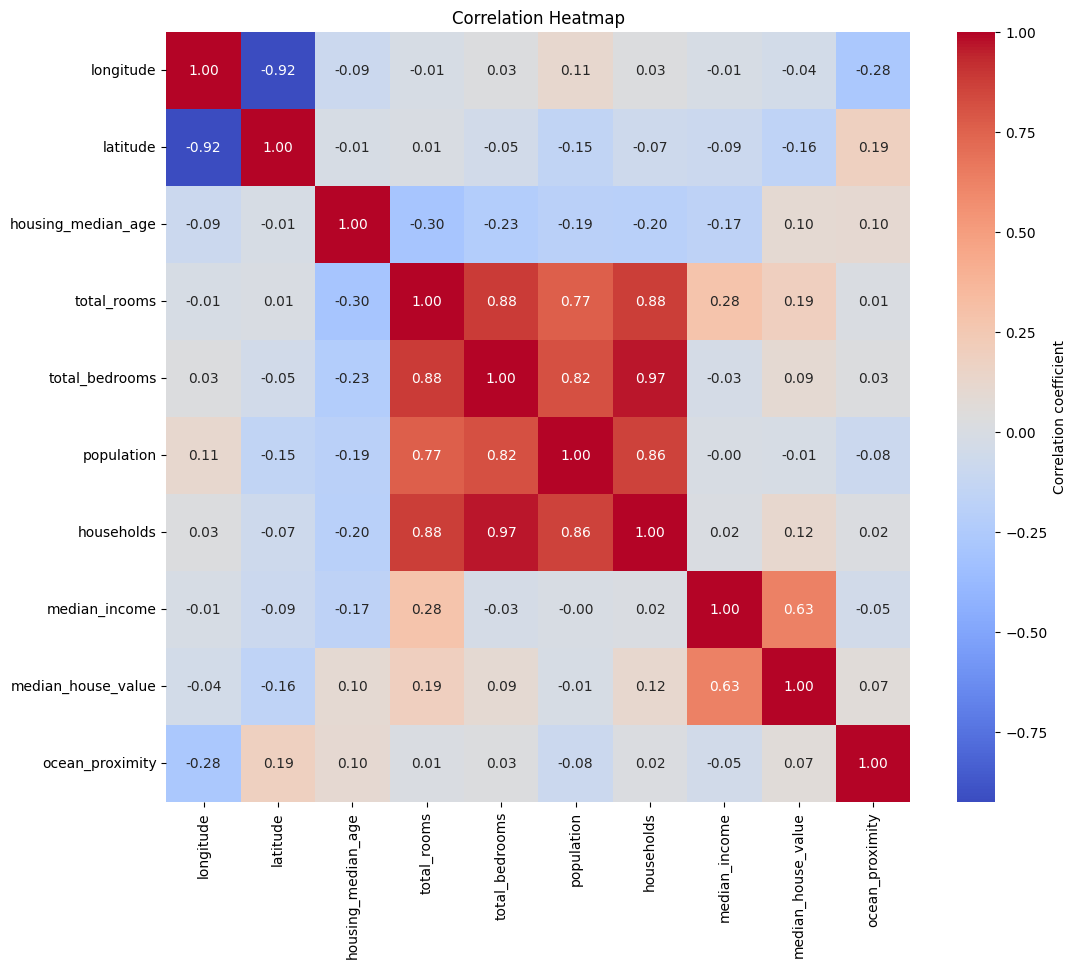

In [43]:
# Assuming 'data' is your DataFrame and all categorical variables have been encoded
correlation_matrix = cleaned_data.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Heatmap')
plt.show()



In [46]:

# Assuming all necessary columns are numerical and not categorical
# It's important to only include numeric columns here
multi_col = cleaned_data.select_dtypes(include=[np.number])

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = multi_col.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(multi_col.values, i) for i in range(len(multi_col.columns))]

print(vif_data)


              Feature         VIF
0           longitude  695.318147
1            latitude  601.039867
2  housing_median_age    8.481262
3         total_rooms   45.273695
4      total_bedrooms   99.769755
5          population   22.955052
6          households  106.714966
7       median_income   22.852312
8  median_house_value   11.042307
9     ocean_proximity    1.819981


In [48]:
# Drop the features: 'longitude', 'total_rooms', and 'total_bedrooms'
features = cleaned_data.drop(['longitude', 'total_rooms', 'total_bedrooms'], axis=1)

# Check the first few rows to confirm changes
print(features.head())

   latitude  housing_median_age  population  households  median_income  \
2     37.85                52.0       496.0       177.0         7.2574   
3     37.85                52.0       558.0       219.0         5.6431   
4     37.85                52.0       565.0       259.0         3.8462   
5     37.85                52.0       413.0       193.0         4.0368   
6     37.84                52.0      1094.0       514.0         3.6591   

   median_house_value  ocean_proximity  
2            352100.0                3  
3            341300.0                3  
4            342200.0                3  
5            269700.0                3  
6            299200.0                3  


In [52]:


X = features.drop('median_house_value', axis=1)
y = features['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Ensure environment variables are set
import os
os.environ['MLFLOW_TRACKING_URI'] = 'http://localhost:5001/'
os.environ['MLFLOW_S3_ENDPOINT_URL'] = 'http://localhost:9000/'

In [89]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [107]:
def train_and_log_model(model, model_name, alpha=None):
    """
    Trains a regression model, logs parameters, metrics, and model artifacts to MLflow.
    
    Parameters:
    - model: The regression model (Linear Regression, Ridge, Lasso, etc.).
    - model_name: String representing the model type (e.g., "LinearRegression").
    - alpha: Regularization parameter (optional, used for Ridge/Lasso).
    
    Logs:
    - Model parameters (alpha, model type).
    - Performance metrics (MSE, R² score).
    - Trained model to MLflow.
    """
    with mlflow.start_run(run_name=f"{model_name}_Run"):  # Naming each MLflow run
        # Log model name
        mlflow.set_tag("model", model_name)

        # Train the model
        if alpha is not None:
            model.fit(X_train_scaled, y_train)
        else:
            model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate performance metrics
        (rmse, mae, r2) = eval_metrics(y_test, y_pred)

        # Log parameters
        if alpha is not None:
            mlflow.log_param("alpha", alpha)
        mlflow.log_param("model_type", model_name)

        # Log metrics
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2_score", r2)

        # Log the model
        mlflow.sklearn.log_model(model, model_name)

        print(f"Model: {model_name}, Alpha: {alpha}, RMSE: {rmse:.2f},  MAE: {mae:.2f}, R2 Score: {r2:.2f}")

        # Log dataset
        # Create an instance of a PandasDataset
        dataset = mlflow.data.from_pandas(cleaned_data, source=url, name="HousePricing", targets="median_house_value")
        mlflow.log_input(dataset, context="training")
     
        #tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        #if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
        #    mlflow.sklearn.log_model(model, "model")
        #else:
        #    mlflow.sklearn.log_model(model, "model")


In [108]:
mlflow.set_experiment("HousingPricePrediction_v3")

<Experiment: artifact_location='mlflow-artifacts:/4', creation_time=1738776892043, experiment_id='4', last_update_time=1738776892043, lifecycle_stage='active', name='HousingPricePrediction_v3', tags={}>

In [109]:
# Linear Regression
train_and_log_model(LinearRegression(), "LinearRegression")

# Ridge Regression with different alpha values
train_and_log_model(Ridge(alpha=1.0), "RidgeRegression", alpha=1.0)
train_and_log_model(Ridge(alpha=10.0), "RidgeRegression", alpha=10.0)

# Lasso Regression with different alpha values
train_and_log_model(Lasso(alpha=0.1), "LassoRegression", alpha=0.1)
train_and_log_model(Lasso(alpha=1.0), "LassoRegression", alpha=1.0)


/Users/bernayilmaz/miniconda3/envs/lab-env/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
2025/02/05 20:46:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: LinearRegression, Alpha: None, RMSE: 76415.28,  MAE: 56924.24, R2 Score: 0.36
🏃 View run LinearRegression_Run at: http://localhost:5001/#/experiments/4/runs/5692bf72ef034349b1bf8c20ed6a2dd7
🧪 View experiment at: http://localhost:5001/#/experiments/4


/Users/bernayilmaz/miniconda3/envs/lab-env/lib/python3.9/site-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'https://github.com/erkansirin78/datasets/raw/master/housing.csv'. Exception: 
  return _dataset_source_registry.resolve(
/Users/bernayilmaz/miniconda3/envs/lab-env/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https

Model: RidgeRegression, Alpha: 1.0, RMSE: 65872.03,  MAE: 49819.08, R2 Score: 0.53
🏃 View run RidgeRegression_Run at: http://localhost:5001/#/experiments/4/runs/98b88f42259a4e549f44dc2827653d93
🧪 View experiment at: http://localhost:5001/#/experiments/4


2025/02/05 20:46:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: RidgeRegression, Alpha: 10.0, RMSE: 65876.39,  MAE: 49823.63, R2 Score: 0.53
🏃 View run RidgeRegression_Run at: http://localhost:5001/#/experiments/4/runs/9b1286a26c2b4645a5de013296494b8e
🧪 View experiment at: http://localhost:5001/#/experiments/4


/Users/bernayilmaz/miniconda3/envs/lab-env/lib/python3.9/site-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'https://github.com/erkansirin78/datasets/raw/master/housing.csv'. Exception: 
  return _dataset_source_registry.resolve(
/Users/bernayilmaz/miniconda3/envs/lab-env/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https

Model: LassoRegression, Alpha: 0.1, RMSE: 65871.57,  MAE: 49818.61, R2 Score: 0.53
🏃 View run LassoRegression_Run at: http://localhost:5001/#/experiments/4/runs/f43a27ef18284c989317080d97b86bca
🧪 View experiment at: http://localhost:5001/#/experiments/4


2025/02/05 20:46:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/Users/bernayilmaz/miniconda3/envs/lab-env/lib/python3.9/site-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'https://github.com/erkansirin78/datasets/raw/master/housing.csv'. Exception: 
  return _dataset_source_registry.resolve(
/Users/bernayilmaz/miniconda3/envs/lab-env/lib/python3.9/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset)

Model: LassoRegression, Alpha: 1.0, RMSE: 65871.72,  MAE: 49818.74, R2 Score: 0.53
🏃 View run LassoRegression_Run at: http://localhost:5001/#/experiments/4/runs/82dcf9326d9e42ef9899a3beed751bbf
🧪 View experiment at: http://localhost:5001/#/experiments/4


In [110]:
best_model_run_id = "f43a27ef18284c989317080d97b86bca"  # Replace with actual best run ID from MLflow UI
best_model_name = "LassoRegression_alpha01"  # Change if needed


In [111]:

# Register the model from the best run
model_uri = f"runs:/{best_model_run_id}/{best_model_name}"

mlflow.register_model(
    model_uri=model_uri,
    name="Best_Housing_Price_Model"
)

print(f"Best model '{best_model_name}' registered successfully!")


Successfully registered model 'Best_Housing_Price_Model'.
2025/02/05 20:50:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Best_Housing_Price_Model, version 1


Best model 'LassoRegression_alpha01' registered successfully!


Created version '1' of model 'Best_Housing_Price_Model'.


In [83]:
# List all existing experiments
experiments = mlflow.search_experiments(view_type=mlflow.entities.ViewType.ALL)

# Print experiment details
for exp in experiments:
    print(f"Experiment Name: {exp.name}, ID: {exp.experiment_id}, Lifecycle Stage: {exp.lifecycle_stage}")


Experiment Name: HousingPricePrediction_v2, ID: 3, Lifecycle Stage: active
Experiment Name: HousingPricePrediction_v1, ID: 2, Lifecycle Stage: active
Experiment Name: HousingPricePrediction, ID: 1, Lifecycle Stage: deleted
Experiment Name: Default, ID: 0, Lifecycle Stage: active
